Total packets: 6153
Unique senders: 50
       sendtime       rcvtime  senderID  messageID  \
0  25200.003843  25200.003960       106        803   
1  25200.009710  25200.009817       136       1376   
2  25200.014335  25200.014441        58       1782   
3  25200.018319  25200.018428       190       2102   
4  25200.023053  25200.023167       244       2379   

                                      position  \
0  [5253.960995686507, 5029.174807675536, 0.0]   
1  [5238.334820411848, 5047.478123724656, 0.0]   
2   [5544.46820819728, 4997.072322123463, 0.0]   
3    [5259.78982256518, 5031.85364305199, 0.0]   
4  [5266.253267376983, 5031.143144355779, 0.0]   

                                               speed   heading  ddostype  \
0                                   [-0.0, 0.0, 0.0]  1.961568         0   
1                                   [0.0, -0.0, 0.0]  1.961568         0   
2                                  [-0.0, -0.0, 0.0]  1.961568         0   
3                              

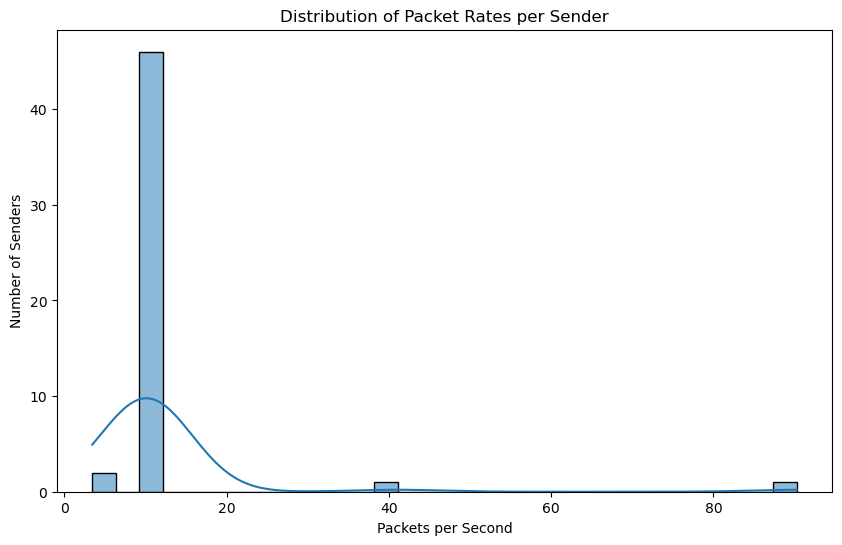

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Dataset_pkt_28.json'

with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# === Basic Info ===
print("Total packets:", len(df))
print("Unique senders:", df['senderID'].nunique())
print(df.head())

# === Add latency column ===
df['latency'] = df['rcvtime'] - df['sendtime']

# === Sender-level aggregation ===
sender_stats = df.groupby('senderID').agg(
    total_packets=('messageID', 'count'),
    avg_latency=('latency', 'mean'),
    std_latency=('latency', 'std'),
    first_send=('sendtime', 'min'),
    last_send=('sendtime', 'max'),
).reset_index()

# === Calculate rate per sender (pkts/sec) ===
sender_stats['duration'] = sender_stats['last_send'] - sender_stats['first_send']
sender_stats['pkt_rate'] = sender_stats['total_packets'] / sender_stats['duration'].replace(0, 1e-6)

# === Sort by packet rate ===
top_senders = sender_stats.sort_values(by='pkt_rate', ascending=False)

print("\nTop senders by packet rate:")
print(top_senders.head())

# === Plotting ===
plt.figure(figsize=(10, 6))
sns.histplot(sender_stats['pkt_rate'], bins=30, kde=True)
plt.title("Distribution of Packet Rates per Sender")
plt.xlabel("Packets per Second")
plt.ylabel("Number of Senders")
plt.show()


Total packets: 9018
Unique senders: 31
       sendtime       rcvtime  senderID  messageID  \
0  25200.006415  25200.006520       166        904   
1  25200.007104  25200.007216        34       1084   
2  25200.008311  25200.008419       178       1211   
3  25200.013547  25200.013654       262       1667   
4  25200.014967  25200.015078        76       1959   

                                        position  \
0    [5697.633049119333, 4928.504490267823, 0.0]   
1   [5750.435148911961, 4888.8054415518545, 0.0]   
2    [5727.538063224318, 4915.671738764672, 0.0]   
3     [5732.167012765934, 4891.38384378471, 0.0]   
4  [5745.5459464322375, 4897.6635785105655, 0.0]   

                                            speed   heading  ddostype  msgtype  
0                                [0.0, -0.0, 0.0]  0.405353         0        0  
1                                [-0.0, 0.0, 0.0]  0.405353         0        0  
2                                [0.0, -0.0, 0.0]  0.405353         0        0  

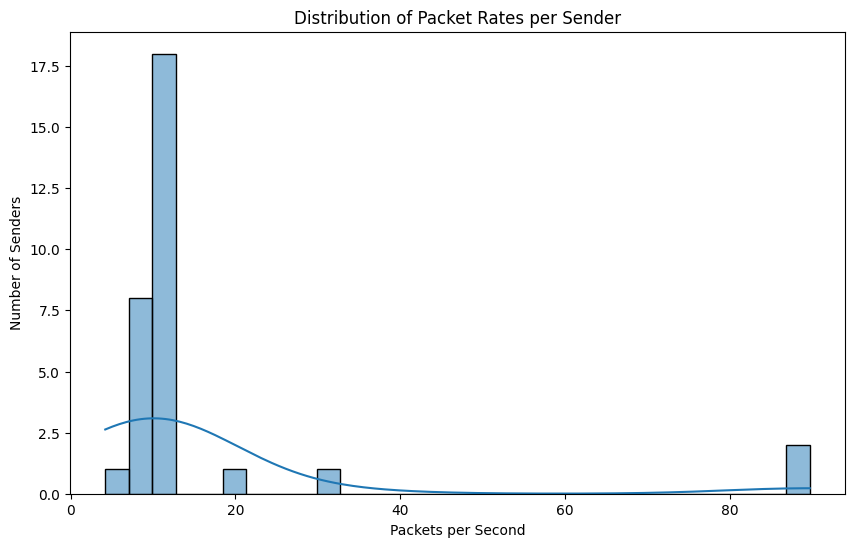

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Dataset_pkt_220.json'

with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# === Basic Info ===
print("Total packets:", len(df))
print("Unique senders:", df['senderID'].nunique())
print(df.head())

# === Add latency column ===
df['latency'] = df['rcvtime'] - df['sendtime']

# === Sender-level aggregation ===
sender_stats = df.groupby('senderID').agg(
    total_packets=('messageID', 'count'),
    avg_latency=('latency', 'mean'),
    std_latency=('latency', 'std'),
    first_send=('sendtime', 'min'),
    last_send=('sendtime', 'max'),
).reset_index()

# === Calculate rate per sender (pkts/sec) ===
sender_stats['duration'] = sender_stats['last_send'] - sender_stats['first_send']
sender_stats['pkt_rate'] = sender_stats['total_packets'] / sender_stats['duration'].replace(0, 1e-6)

# === Sort by packet rate ===
top_senders = sender_stats.sort_values(by='pkt_rate', ascending=False)

print("\nTop senders by packet rate:")
print(top_senders.head())

# === Plotting ===
plt.figure(figsize=(10, 6))
sns.histplot(sender_stats['pkt_rate'], bins=30, kde=True)
plt.title("Distribution of Packet Rates per Sender")
plt.xlabel("Packets per Second")
plt.ylabel("Number of Senders")
plt.show()


Total packets: 50
Unique senders: 3
   sendtime       rcvtime  senderID  messageID  \
0  25269.01  25269.010113       262    6893924   
1  25269.11  25269.110112       262    6908470   
2  25269.21  25269.210110       262    6923083   
3  25269.31  25269.310109       262    6937508   
4  25269.41  25269.410107       262    6951915   

                                       position  \
0   [5853.279216211777, 5143.576934148898, 0.0]   
1  [5858.894008380947, 5154.9747064939465, 0.0]   
2  [5858.894008380947, 5154.9747064939465, 0.0]   
3  [5858.894008380947, 5154.9747064939465, 0.0]   
4  [5858.894008380947, 5154.9747064939465, 0.0]   

                                         speed   heading  ddostype  msgtype  
0  [5.68747165170552, 11.627901153056326, 0.0]  0.461763         0        0  
1  [5.653585590616745, 11.37047486123359, 0.0]  0.461763         0        0  
2  [5.653585590616745, 11.37047486123359, 0.0]  0.461763         0        0  
3  [5.653585590616745, 11.37047486123359, 0.

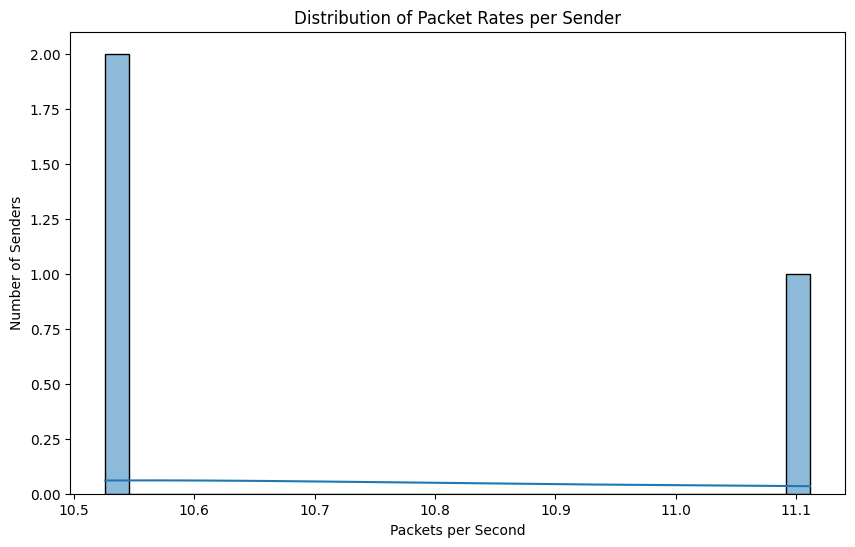

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Dataset_pkt_460.json'

with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# === Basic Info ===
print("Total packets:", len(df))
print("Unique senders:", df['senderID'].nunique())
print(df.head())

# === Add latency column ===
df['latency'] = df['rcvtime'] - df['sendtime']

# === Sender-level aggregation ===
sender_stats = df.groupby('senderID').agg(
    total_packets=('messageID', 'count'),
    avg_latency=('latency', 'mean'),
    std_latency=('latency', 'std'),
    first_send=('sendtime', 'min'),
    last_send=('sendtime', 'max'),
).reset_index()

# === Calculate rate per sender (pkts/sec) ===
sender_stats['duration'] = sender_stats['last_send'] - sender_stats['first_send']
sender_stats['pkt_rate'] = sender_stats['total_packets'] / sender_stats['duration'].replace(0, 1e-6)

# === Sort by packet rate ===
top_senders = sender_stats.sort_values(by='pkt_rate', ascending=False)

print("\nTop senders by packet rate:")
print(top_senders.head())

# === Plotting ===
plt.figure(figsize=(10, 6))
sns.histplot(sender_stats['pkt_rate'], bins=30, kde=True)
plt.title("Distribution of Packet Rates per Sender")
plt.xlabel("Packets per Second")
plt.ylabel("Number of Senders")
plt.show()


Total packets: 9531
Unique senders: 32
       sendtime       rcvtime  senderID  messageID  \
0  25234.028281  25234.028399       154    4008807   
1  25234.037775  25234.037883       328    4009667   
2  25234.041140  25234.041257       304    4010334   
3  25234.075069  25234.075185       100    4014479   
4  25234.097862  25234.097972        46    4017026   

                                       position  \
0  [5747.9616826959655, 4917.907403572723, 0.0]   
1   [5725.600097034178, 4878.392346661327, 0.0]   
2   [5728.998855772901, 4885.116197884767, 0.0]   
3   [5748.420038274202, 4911.628294044684, 0.0]   
4   [5745.430583077128, 4913.019457400989, 0.0]   

                                               speed   heading  ddostype  \
0                                  [-0.0, -0.0, 0.0]  2.025165         0   
1  [0.007623027246298824, 0.015080829507659193, 0.0]  2.025165         0   
2                                    [0.0, 0.0, 0.0]  2.025165         0   
3                        

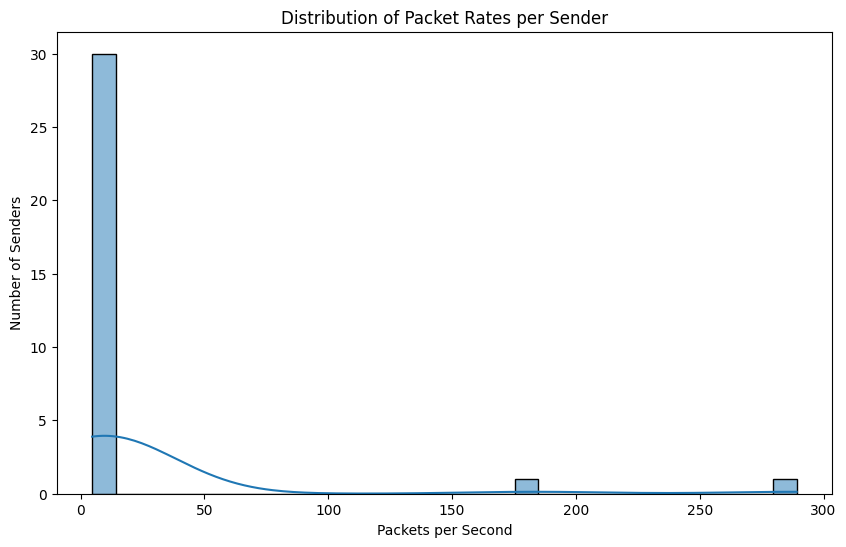

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Dataset_pkt_400.json'

with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# === Basic Info ===
print("Total packets:", len(df))
print("Unique senders:", df['senderID'].nunique())
print(df.head())

# === Add latency column ===
df['latency'] = df['rcvtime'] - df['sendtime']

# === Sender-level aggregation ===
sender_stats = df.groupby('senderID').agg(
    total_packets=('messageID', 'count'),
    avg_latency=('latency', 'mean'),
    std_latency=('latency', 'std'),
    first_send=('sendtime', 'min'),
    last_send=('sendtime', 'max'),
).reset_index()

# === Calculate rate per sender (pkts/sec) ===
sender_stats['duration'] = sender_stats['last_send'] - sender_stats['first_send']
sender_stats['pkt_rate'] = sender_stats['total_packets'] / sender_stats['duration'].replace(0, 1e-6)

# === Sort by packet rate ===
top_senders = sender_stats.sort_values(by='pkt_rate', ascending=False)

print("\nTop senders by packet rate:")
print(top_senders.head())

# === Plotting ===
plt.figure(figsize=(10, 6))
sns.histplot(sender_stats['pkt_rate'], bins=30, kde=True)
plt.title("Distribution of Packet Rates per Sender")
plt.xlabel("Packets per Second")
plt.ylabel("Number of Senders")
plt.show()


In [2]:
import json
import pandas as pd
import numpy as np

# === Load dataset_pkt_28 ===
with open('dataset_pkt_28.json', 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# === Create latency and rounded time windows ===
df['latency'] = df['rcvtime'] - df['sendtime']
df['rcvtime_rounded'] = df['rcvtime'].apply(lambda x: int(x))  # 1-sec window

# === Aggregate features per 1-second window ===
window_features = df.groupby('rcvtime_rounded').agg(
    received_packets=('messageID', 'count'),
    IAT_Mean=('rcvtime', lambda x: np.mean(np.diff(sorted(x)))),
    IAT_Std=('rcvtime', lambda x: np.std(np.diff(sorted(x)))),
    IAT_Max=('rcvtime', lambda x: np.max(np.diff(sorted(x))) if len(x) > 1 else 0),
    IAT_Min=('rcvtime', lambda x: np.min(np.diff(sorted(x))) if len(x) > 1 else 0),
    received_addresses=('senderID', pd.Series.nunique),
    max_pkt_from_sameId=('senderID', lambda x: x.value_counts().max())
).reset_index().rename(columns={'rcvtime_rounded': 'timewindow'})

print("Sample aggregated window features:")
print(window_features.head())


Sample aggregated window features:
   timewindow  received_packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0       25200               160  0.006204  0.004656  0.015629  0.001047   
1       25201               160  0.006204  0.004656  0.015629  0.001047   
2       25202               160  0.006204  0.004656  0.015629  0.001047   
3       25203               150  0.006620  0.004593  0.015629  0.001151   
4       25204               130  0.007646  0.006466  0.023687  0.001151   

   received_addresses  max_pkt_from_sameId  
0                  16                   10  
1                  16                   10  
2                  16                   10  
3                  15                   10  
4                  13                   10  


c:\Users\AIML\anaconda3\envs\aiml\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\AIML\anaconda3\envs\aiml\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\AIML\anaconda3\envs\aiml\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\AIML\anaconda3\envs\aiml\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\AIML\anaconda3\envs\aiml\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [3]:
import json
import pandas as pd
import numpy as np

# === Step 1: Load dataset_pkt_28 ===
with open('Dataset_pkt_28.json', 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)

# === Step 2: Create latency and time window columns ===
df['latency'] = df['rcvtime'] - df['sendtime']
df['rcvtime_rounded'] = df['rcvtime'].apply(lambda x: int(x))  # 1-second bins

# === Step 3: Aggregate features per window ===
window_features = df.groupby('rcvtime_rounded').agg(
    received_packets=('messageID', 'count'),
    IAT_Mean=('rcvtime', lambda x: np.mean(np.diff(sorted(x))) if len(x) > 1 else 0),
    IAT_Std=('rcvtime', lambda x: np.std(np.diff(sorted(x))) if len(x) > 1 else 0),
    IAT_Max=('rcvtime', lambda x: np.max(np.diff(sorted(x))) if len(x) > 1 else 0),
    IAT_Min=('rcvtime', lambda x: np.min(np.diff(sorted(x))) if len(x) > 1 else 0),
    received_addresses=('senderID', pd.Series.nunique),
    max_pkt_from_sameId=('senderID', lambda x: x.value_counts().max())
).reset_index().rename(columns={'rcvtime_rounded': 'timewindow'})

# === Step 4: Label windows if any packet had ddostype > 0 ===
# Create label dataframe
df['is_attack'] = df['ddostype'].apply(lambda x: 1 if x > 0 else 0)

window_labels = df.groupby('rcvtime_rounded')['is_attack'].max().reset_index()
window_labels = window_labels.rename(columns={'rcvtime_rounded': 'timewindow', 'is_attack': 'has_attacker'})

# === Step 5: Merge features with labels ===
window_features_labeled = pd.merge(window_features, window_labels, on='timewindow', how='left')
window_features_labeled['has_attacker'] = window_features_labeled['has_attacker'].fillna(0).astype(int)

print("✅ Final labeled window feature dataset:")
print(window_features_labeled.head())

# === (Optional) Save to CSV for ML training ===
window_features_labeled.to_csv('window_features_labeled_pkt28.csv', index=False)


✅ Final labeled window feature dataset:
   timewindow  received_packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0       25200               160  0.006204  0.004656  0.015629  0.001047   
1       25201               160  0.006204  0.004656  0.015629  0.001047   
2       25202               160  0.006204  0.004656  0.015629  0.001047   
3       25203               150  0.006620  0.004593  0.015629  0.001151   
4       25204               130  0.007646  0.006466  0.023687  0.001151   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  16                   10             0  
1                  16                   10             0  
2                  16                   10             0  
3                  15                   10             0  
4                  13                   10             0  
